# DATA VISUALIZATION using ploty and IPython widgets

Result - link to the graph https://plot.ly/~klall3/29/ (without the Cylinders slider Widget) 
Widget along with the plot should open in the notebook at excution of the code below. Sliding the slider, you can see the changes in the graph. You can also use the drop-down menu to view different plots.

***PLEASE NOTE that plotly GraphWidget may not display in the notebook due to mismatch of Jupyter notebook version and IPython version. I downgraded to notebook 4.0.6 to make it work. 

In [1]:
#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

#Import all the libraries to be used
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
from ipywidgets import widgets 
from IPython.display import display, clear_output, Image
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
from plotly.graph_objs import Scatter

plotly.tools.set_credentials_file(username='klall3', api_key='e9dDCPMOJKixFpHmpblA')

#Import .csv file to pandas
df = pd.read_csv('Auto.csv')

#Remove Make-Model as it is string and not very useful for data visualization
df = df.drop('Make-Model',1)

#Removing the ? from the given data and replacing it with NaN
df =df.replace('?', np.nan)

#filling NaNs with the mean values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values= 'NaN', strategy = 'median' , axis = 0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)


#preparing data for plotting
y1 = df['mpg']
x1 = df['horsepower']
x2 = df['displacement']
x3 = df['weight']
x4 = df['year']

# Create traces
trace0 = go.Scatter(
    x = x1,
    y = y1,
    mode = 'markers',
    name = 'mpg vs bhp'
)
trace1 = go.Scatter(
    x = x2,
    y = y1,
    mode = 'markers',
    name = 'mpg vs displacement'
)
trace2 = go.Scatter(
    x = x3,
    y = y1,
    mode = 'markers',
    name = 'mpg vs weight'
)
trace3 = go.Scatter(
    x = x4,
    y = y1,
    mode = 'markers',
    name = 'mpg vs year'
)

data = [trace0, trace1, trace2, trace3]
py.iplot(data, filename='scatter-mode')

#
data = Data([trace0, trace1, trace2,trace3])
layout = Layout(
    title='AUTO DATA',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True, True, True, True]],
                    label='All',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, False, False, False]],
                    label='mpg vs horsepower',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, True, False, False]],
                    label='mpg vs displacement',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, True, False]],
                    label='mpg vs weight',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, True]],
                    label='mpg vs year',
                    method='restyle'
                ),
                
            ]),
        )
    ]),
)

fig = Figure(data=data, layout=layout)
#url = py.iplot(fig, filename='Auto Data')

#create a graph widget for the plot which plotted above to be modified with the widget value
g = GraphWidget('https://plot.ly/~klall3/29/')

# Creating a slider widget for nuber of cylinders 
Cylinders = widgets.FloatSlider(
    value=1.0,
    min=3.0,
    max=8.0,
    step=1.0,
    description='Cylinders:',
    continuous_update = False
)

#creating a container for the widget
container = widgets.HBox(children=[Cylinders] )

# Define a response function to capture the slider movement and updating the plot 
def response(change):
    filter_list = [i for i in df['cylinders'] == Cylinders.value]
    temp_df = df[filter_list]
    y = temp_df['mpg']
    x1 = temp_df['horsepower']
    x2 = temp_df['displacement']
    x3 = temp_df['weight']
    x4 = temp_df['year']
 
    g.restyle({'x':[x1], 'y':[y]}, indices=[0])
    g.restyle({'x':[x2], 'y':[y]}, indices=[1])
    g.restyle({'x':[x3], 'y':[y]}, indices=[2])
    g.restyle({'x':[x4], 'y':[y]}, indices=[3])

Cylinders.observe(response, names="value")

display(container)
display(g)


<IPython.core.display.Javascript object>

# Regression model to predict car's mpg based on other features 

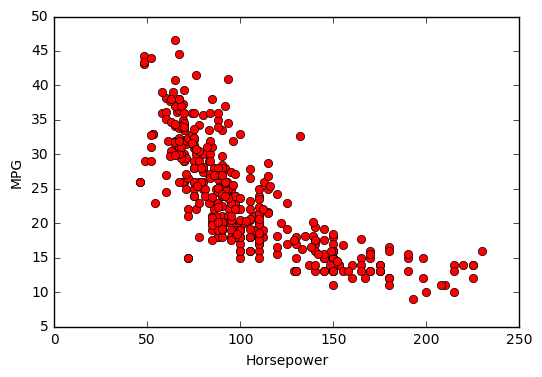

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import OneHotEncoder

#Import .csv file to pandas
df = pd.read_csv('Auto.csv')

#drop 
df = df.drop('Make-Model',1)
#df = df.drop('year',1)
df = df.drop('origin',1)

df =df.replace('?', np.nan)

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values= 'NaN', strategy = 'median' , axis = 0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

#Create input and output data sets
y1 = df.mpg
x1 = df.horsepower

X = df.drop('mpg',1)
Y = df.mpg

from sklearn import preprocessing

# Scatter plot between mpg and horsepower 
plt.plot(X.horsepower,Y,'ro')
plt.ylabel('MPG')
plt.xlabel('Horsepower')
plt.show()

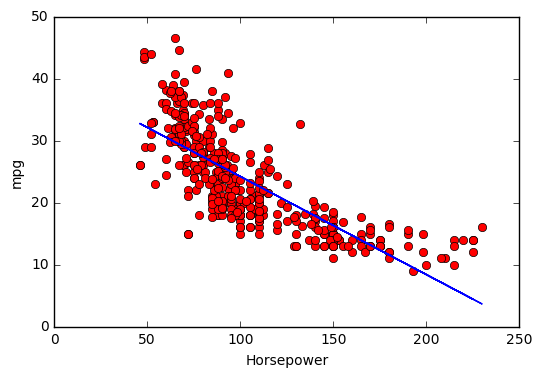

0.5984298421223968

In [5]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X.horsepower[:,np.newaxis],Y)

#Plotting linear regression line for mpg vs horsepower(since horsepower seems to be the most important factor) 
plt.plot(X.horsepower,Y,'ro')
plt.plot(X.horsepower, lm.predict (X.horsepower[:,np.newaxis]), color='blue')
plt.ylabel('mpg')
plt.xlabel('Horsepower')
plt.show()
lm.score(X.horsepower[:,np.newaxis],Y)

In [6]:
from sklearn.metrics import r2_score

#normalizing data
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

#Splitting the training and test data (70/30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

#Lasso Regression Model
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,Y_train)

#Calculating model scores (r^2)
print(clf.coef_)
print (clf.score(X_train, Y_train, sample_weight=None))
print (clf.score(X_test, Y_test, sample_weight=None))
pd.DataFrame(zip(X.columns, np.transpose(clf.coef_)))

[ -1.1678408   -0.          -0.         -20.65996357   0.           8.47486426]
0.801229281499
0.816605788241


,0,1
0,cylinders,-1.167841
1,displacement,-0.000000
2,horsepower,-0.000000
3,weight,-20.659964
4,acceleration,0.000000
5,year,8.474864


**Result - We can see from the plot that mpg vs horsepower doesn't fit the linear regression very well. The model score is also 0.51. Hence, I use Lasso Regression model as it eliminates the non-important predictors. Model Score (r^2) from Lasso is arround 081, which a good score.

# Classification Problem
Create a new variable as a flag for those cars with acceleration above 15 or less than/equal to 15. Name the new variable as “Target”. Develop a classifier to classify cars based on their different features and the Target as the response variable

In [7]:
import numpy as np
import pandas as pd
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import OneHotEncoder

#Import .csv file to pandas
df = pd.read_csv('Auto.csv')
df = df.drop('Make-Model',1)

df =df.replace('?', np.nan)

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values= 'NaN', strategy = 'median' , axis = 0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

#Create a new binary output variable Target, Target = 1 if acceleration>=15, else 0 
df['Target'] = [1 if x>15 else 0 for x in df['acceleration'] ]

#creating the input and output datasets 
X = df.drop('acceleration',1)
X = X.drop('Target',1)
Y = df.Target

#Normalizing data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

#Splitting traing and test datasets (70/30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)


In [8]:
import sklearn.feature_selection
from sklearn.feature_selection import chi2
import pandas as pd

#feature selection using chi squared method
select = sklearn.feature_selection.SelectKBest(score_func=chi2,k=4)
selected_features = select.fit(X_train, Y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]
colnames_selected
X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Function to calculate AUC using roc_auc_score
def model_score(x_train, y_train, x_test, y_test):
    model = LogisticRegression(penalty='l2', C=100)
    model.fit(x_train, Y_train)
    y_hat = [x[1] for x in model.predict_proba(x_test)]
    auc = roc_auc_score(y_test, y_hat)
    return auc

auc_processed = model_score(X_train, Y_train, X_test, Y_test)
print auc_processed

0.88496804668


In [12]:
#Caluculate Model score by applying logistic regression
model = LogisticRegression(penalty='l2', C=10)
model.fit(X_train, Y_train)
print model.score(X_train, Y_train, sample_weight=None)

#Calculate Model score for test data using the same model
print model.score(X_test, Y_test, sample_weight=None)

#Calculate 10 fold cross validation score
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print scores.mean()

0.797833935018
0.791666666667
0.749776422764


In [11]:
#Using statsmodels.api to get the summary result
import statsmodels.api 

logit = sm.Logit(Y, X)
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.446836
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  397
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Dec 2016   Pseudo R-squ.:                  0.3517
Time:                        20:59:34   Log-Likelihood:                -177.39
converged:                       True   LL-Null:                       -273.63
                                        LLR p-value:                 7.549e-39
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mpg              3.3891      0.836      4.052      0.000         1.750     5.029
cylinders        2.0687

**Result - we can see that for accleration - horsepower, cylinders, weight and displacement are the important features
Also, with AUC of around 0.88, Logistic Regression does good job in this problem and also doesn't over-fit. 